#### Information about the data:
**Inspiration**
Get your feet wet with regression techniques here on Kaggle by using this dataset. Perfect for beginners since the **OpenIntro Statistics book** does a good explanation in Chapter 8.

1. Can we use total length to predict a possum's head length?
2. Which possum body dimensions are most correlated with age and sex?
3. Can we classify a possum's sex by its body dimensions and location?
4. Can we predict a possum's trapping location from its body dimensions?

This Project Done By:
- **PAVAN KUMAR ADAPALA  - Matriculation Number: 649315**

## 1. Business Understanding

### My Goal is:
- By using regression skills to predict the age of a possum, its head length, whether it is male or female.

##### Import required Libraries

In [335]:
import warnings
warnings.filterwarnings('ignore')

In [336]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data Understanding

##### read/import the data 

In [337]:
p_df = pd.read_csv("possum.csv")

In [338]:
p_df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [339]:
p_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


Note:
1. The data having 14 columns among them 2 columns(sex,pop) are contain categoreical data and rest of them are numerical data.
2. The **site** column contained numerical data but it is a categorical data because the values representing the location.
3. Possum data having **null values** at columns **age,footlgth**.

In [340]:
p_df.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [341]:
# null values in columns
print(p_df.isnull().sum())
print((p_df.isnull().sum()*100)/len(p_df))

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64
case        0.000000
site        0.000000
Pop         0.000000
sex         0.000000
age         1.923077
hdlngth     0.000000
skullw      0.000000
totlngth    0.000000
taill       0.000000
footlgth    0.961538
earconch    0.000000
eye         0.000000
chest       0.000000
belly       0.000000
dtype: float64


Note:
- the missing value percentage is less than the 2% so we can keep the columns and also replace the missinng values.

In [342]:
p_df[p_df['age'].isnull()]

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
43,44,2,Vic,m,NaN,85.1,51.5,76.0,35.5,70.3,52.6,14.4,23.0,27.0
45,46,2,Vic,m,NaN,91.4,54.4,84.0,35.0,72.8,51.2,14.4,24.5,35.0


In [343]:
p_df[p_df['footlgth'].isnull()]

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
40,41,2,Vic,f,5.0,88.4,57.0,83.0,36.5,NaN,40.3,15.9,27.0,30.5


Note:
- both the null values belong to site 2 and 2 are belong to male & 1 is feamle data.
- I know two imputation techniques (1. IterativeImputer, 2. KNNImputer) to replace null values. the two technique useful for numerical data.

**Data understanding overview:**
 - The data contains categorical data so we need to do Label encoding for this data.
 - The data contains null values in two columns so we need to use Imputation technique to replace null values.
 - To reduce the scale we will do normalization.

## 3. Data preparation

### Repalcing Null vlaues by using Impuation techniques

##### Iterative Imputation technique:
- A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion.

In [344]:
p_num = p_df.drop(['Pop','sex'], axis=1)

In [345]:
from sklearn.experimental import enable_iterative_imputer # to enable/invoke the Iterative Imputer
from sklearn.impute import IterativeImputer
impute_it = IterativeImputer()
IT = impute_it.fit_transform(p_num)

In [346]:
IT[39:45,:]

array([[40.        ,  2.        ,  3.        , 91.        , 55.        ,
        84.5       , 36.        , 72.8       , 51.4       , 13.6       ,
        27.        , 30.        ],
       [41.        ,  2.        ,  5.        , 88.4       , 57.        ,
        83.        , 36.5       , 63.89537909, 40.3       , 15.9       ,
        27.        , 30.5       ],
       [42.        ,  2.        ,  3.        , 85.3       , 54.1       ,
        77.        , 32.        , 62.7       , 51.2       , 13.8       ,
        25.5       , 33.        ],
       [43.        ,  2.        ,  2.        , 90.        , 55.5       ,
        81.        , 32.        , 72.        , 49.4       , 13.4       ,
        29.        , 31.        ],
       [44.        ,  2.        ,  2.36907023, 85.1       , 51.5       ,
        76.        , 35.5       , 70.3       , 52.6       , 14.4       ,
        23.        , 27.        ],
       [45.        ,  2.        ,  3.        , 90.7       , 55.9       ,
        81.        , 3

In [347]:
# converting ndarray into dataframe
df_IT = pd.DataFrame(IT,columns=['case','site','age','hdlngth','skullw','totlngth','taill','footlgth','earconch','eye','chest','belly'])

In [348]:
print(df_IT.info())
print(df_IT.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    float64
 1   site      104 non-null    float64
 2   age       104 non-null    float64
 3   hdlngth   104 non-null    float64
 4   skullw    104 non-null    float64
 5   totlngth  104 non-null    float64
 6   taill     104 non-null    float64
 7   footlgth  104 non-null    float64
 8   earconch  104 non-null    float64
 9   eye       104 non-null    float64
 10  chest     104 non-null    float64
 11  belly     104 non-null    float64
dtypes: float64(12)
memory usage: 9.9 KB
None
   case  site  age  hdlngth  skullw  totlngth  taill  footlgth  earconch  \
0   1.0   1.0  8.0     94.1    60.4      89.0   36.0      74.5      54.5   
1   2.0   1.0  6.0     92.5    57.6      91.5   36.5      72.5      51.2   
2   3.0   1.0  6.0     94.0    60.0      95.5   39.0      75.4      51.9   

##### updating the dataframe with missing values

In [349]:
p_cy = p_df.copy()

In [350]:
p_cy.update(df_IT,overwrite=False) # overwrite Flase update the values in "Nan" places

In [351]:
p_cy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       104 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  104 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


**Note:**
- p_cy in the dataframe without missing values

##### KNN Imputation technique
- Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set. Two samples are close if the features that neither is missing are close.

In [352]:
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=2,copy=True)
knn_df = impute_knn.fit_transform(p_num)

In [353]:
knn_df[39:45,:]

array([[40. ,  2. ,  3. , 91. , 55. , 84.5, 36. , 72.8, 51.4, 13.6, 27. ,
        30. ],
       [41. ,  2. ,  5. , 88.4, 57. , 83. , 36.5, 67.2, 40.3, 15.9, 27. ,
        30.5],
       [42. ,  2. ,  3. , 85.3, 54.1, 77. , 32. , 62.7, 51.2, 13.8, 25.5,
        33. ],
       [43. ,  2. ,  2. , 90. , 55.5, 81. , 32. , 72. , 49.4, 13.4, 29. ,
        31. ],
       [44. ,  2. ,  2. , 85.1, 51.5, 76. , 35.5, 70.3, 52.6, 14.4, 23. ,
        27. ],
       [45. ,  2. ,  3. , 90.7, 55.9, 81. , 34. , 71.5, 54. , 14.6, 27. ,
        31.5]])

Note:
- KNN imputation I used for checking purpose. I contuned with Iteration Imputation values the dataframe is **p_cy**

##### Duplicate values checking 

In [354]:
p_cy.loc[p_cy.duplicated()]

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly


Note:
- No duplicated values

##### distribution plots

In [355]:
def Distributions(df,x,fig):
    plt.figure(figsize=(10,10))
    plt.subplot(4,3,fig)
    sns.distplot(df[x],hist=True,bins=25)
    plt.title(x+" histrogram")


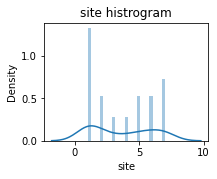

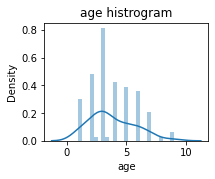

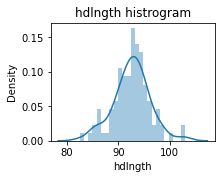

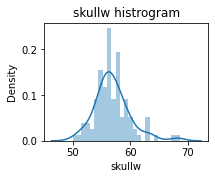

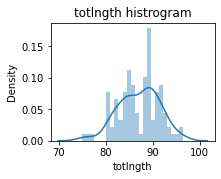

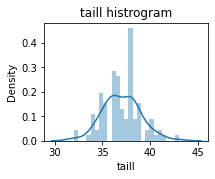

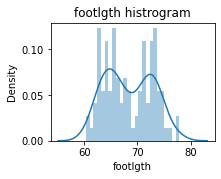

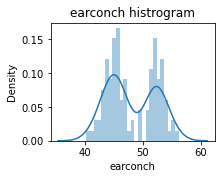

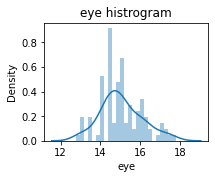

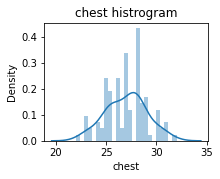

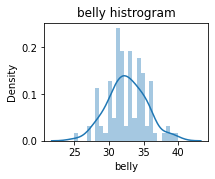

In [356]:
count = 1
for i in ['site','age','hdlngth','skullw','totlngth','taill','footlgth','earconch','eye','chest','belly']:
    Distributions(p_cy,i,count)
    count = count+1
# plt.tight_layout()

Note:
- From histograms "I realized that outliers are presented in the data".

In [357]:
def BoxPlots(df,x,fig):
    plt.figure(figsize=(10,10))
    plt.subplot(4,3,fig)
    sns.boxplot(y=df[x],palette=('cool'))
    plt.title(x+" boxplots")


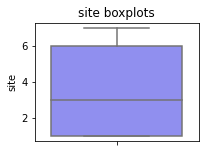

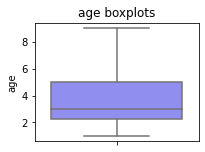

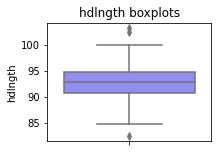

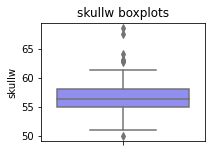

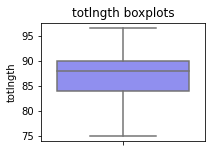

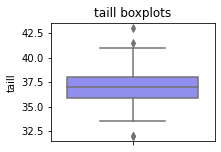

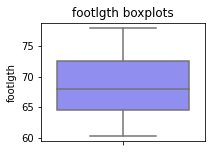

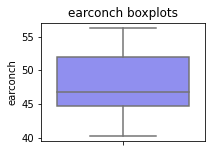

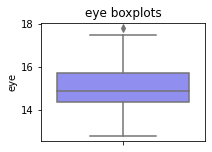

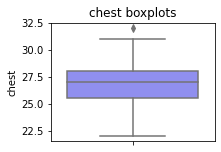

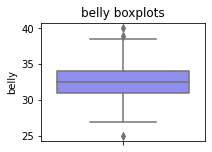

In [358]:
count = 1
for i in ['site','age','hdlngth','skullw','totlngth','taill','footlgth','earconch','eye','chest','belly']:
    BoxPlots(p_cy,i,count)
    count = count+1
# plt.tight_layout()

### Cleaning the data 

#### ouliers finding and elimanation

In [359]:
def Outliersfind(df,x):
    min_th, max_th = df[x].quantile([0.010,0.990])
    return x,min_th,max_th

Note:
- Here i used **quantile technique** to elimate outliers with 10% minimum thershold and 90% maximum thershold

In [360]:
for i in ['hdlngth','skullw','taill','eye','chest','belly']:
    limits = Outliersfind(p_cy,i)
    print(limits)
    # print(p_cy.loc[(p_cy[limits[0]] > limits[2]) | (p_cy[limits[0]] < limits[1])])
    p_cy2 = p_cy[(p_cy[limits[0]] < limits[2]) & (p_cy[limits[0]] > limits[1])]

('hdlngth', 84.712, 102.422)
('skullw', 51.015, 67.595)
('taill', 32.045, 41.485)
('eye', 13.0, 17.497)
('chest', 23.0, 31.0)
('belly', 27.0, 38.985)


In [361]:
print(p_cy2.head())
print(p_cy2.info())

   case  site  Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
0     1     1  Vic   m  8.0     94.1    60.4      89.0   36.0      74.5   
1     2     1  Vic   f  6.0     92.5    57.6      91.5   36.5      72.5   
2     3     1  Vic   f  6.0     94.0    60.0      95.5   39.0      75.4   
3     4     1  Vic   f  6.0     93.2    57.1      92.0   38.0      76.1   
4     5     1  Vic   f  2.0     91.5    56.3      85.5   36.0      71.0   

   earconch   eye  chest  belly  
0      54.5  15.2   28.0   36.0  
1      51.2  16.0   28.5   33.0  
2      51.9  15.5   30.0   34.0  
3      52.2  15.2   28.0   34.0  
4      53.2  15.1   28.5   33.0  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      99 non-null     int64  
 1   site      99 non-null     int64  
 2   Pop       99 non-null     object 
 3   sex       99 non-null     object 
 4   ag

- **p_cy2** is the dataframe without outliers

## Formating the data¶

##### Encoding: converting Categorical data into Numerical data
1. Label Encoding
2. One Hot Encoding
3. Dummy Variable Encoding

In [362]:
ps_dummy = p_cy2.copy()

In [363]:
ps_dummy.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [364]:
# Dummy variable encoding
temp = pd.get_dummies(ps_dummy['sex'],drop_first=True)
ps_dummy = pd.concat([ps_dummy,temp],axis=1)

In [365]:
ps_dummy.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,m
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,1
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,0


In [366]:
ps_lab = p_cy2.copy()

In [367]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
g_val = le.fit_transform(ps_lab['sex'])

In [368]:
ps_lab['sex'] = g_val 

In [369]:
ps_lab.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,0,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,0,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,0,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,0,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


Note:
- 1-male
- 0-female

In [370]:
# One Hot Encoding

from sklearn.preprocessing import OneHotEncoder
g_val = g_val.reshape(len(g_val),-1)
one = OneHotEncoder(sparse=False)
print(one.fit_transform(g_val))
print(type(one.fit_transform(g_val)))

[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]
<class 'numpy.ndarray'>


In [371]:
# Now i used get dummies encoding
def EncodingCol(df,x):
    temp = pd.get_dummies(df[x],drop_first=True)
    df = pd.concat([df,temp],axis=1)
    df.drop(x,axis=1,inplace=True)
    return df

In [372]:
ps_d = EncodingCol(p_cy2,["sex",'Pop'])

In [373]:
ps_d.head()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,sex_m,Pop_other
0,1,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,1,0
1,2,1,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,0,0
2,3,1,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,0,0
3,4,1,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,0,0
4,5,1,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,0,0


- **ps_d** is the dataframe

##### Normalization 
1. min-max normalization - sklearn.preprocessing.MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
2. Z-score normalization - sklearn.preprocessing.StandardScaler(*, copy=True, with_mean=True, with_std=True)
3. Decimal scaling - sklearn.preprocessing.scale(X, *, axis=0, with_mean=True, with_std=True, copy=True)

In [374]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
col = ps_d.columns
print(col)
ps_d[col] = scaler.fit_transform(ps_d[col])

Index(['case', 'site', 'age', 'hdlngth', 'skullw', 'totlngth', 'taill',
       'footlgth', 'earconch', 'eye', 'chest', 'belly', 'sex_m', 'Pop_other'],
      dtype='object')


In [375]:
ps_d.head()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,sex_m,Pop_other
0,0.000000,0.0,0.875,0.563107,0.559140,0.631579,0.363636,0.840237,0.893082,0.48,0.60,0.761905,1.0,0.0
1,0.009709,0.0,0.625,0.485437,0.408602,0.763158,0.409091,0.721893,0.685535,0.64,0.65,0.476190,0.0,0.0
2,0.019417,0.0,0.625,0.558252,0.537634,0.973684,0.636364,0.893491,0.729560,0.54,0.80,0.571429,0.0,0.0
3,0.029126,0.0,0.625,0.519417,0.381720,0.789474,0.545455,0.934911,0.748428,0.48,0.60,0.571429,0.0,0.0
4,0.038835,0.0,0.125,0.436893,0.338710,0.447368,0.363636,0.633136,0.811321,0.46,0.65,0.476190,0.0,0.0


##### Correlation 

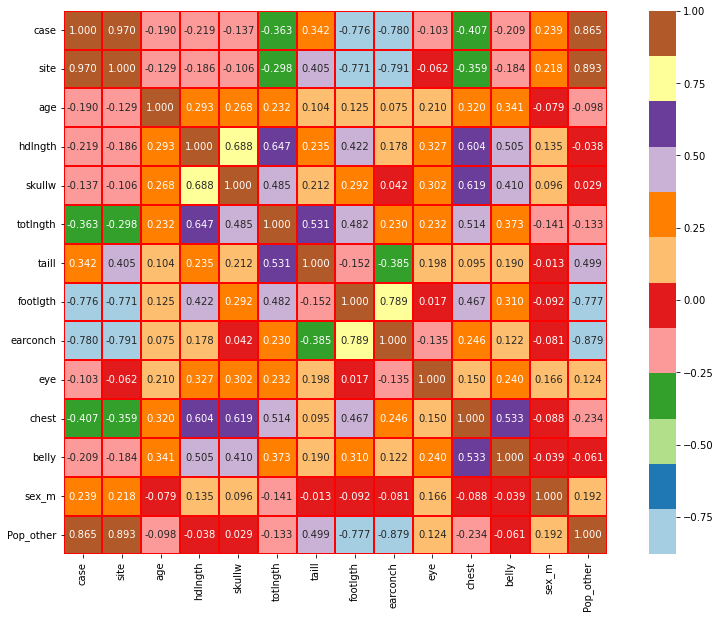

In [376]:
plt.figure(figsize=(15,10))
sns.heatmap(ps_d.corr(),cmap ='Paired', annot = True,fmt=".3f", linewidths = 0.1, linecolor = "Red",square = True)
plt.show()

1. Can we use total length to predict a possum's head length?
- **the correlation between head length and total length is 0.647 so we will use total length in model building**.
2. Which possum body dimensions are most correlated with age and sex?
- with **age** the attributes **belly, chest, headlength** most correlated. 
3. Can we classify a possum's sex by its body dimensions and location?
- there is less correclation between sex and body dimentions but we build and test the model based on results we will conculde.
4. Can we predict a possum's trapping location from its body dimensions?
- there are more chance to predict the location by using body dimentions ['totlngth', 'taill','footlgth', 'earconch', 'chest'].

In [377]:
c_values = ps_d.corr()
for i in ['hdlngth','age','sex_m']:
    print(ps_d.columns[(c_values[i]>0.30) | (c_values[i]<(-0.30))])

Index(['hdlngth', 'skullw', 'totlngth', 'footlgth', 'eye', 'chest', 'belly'], dtype='object')
Index(['age', 'chest', 'belly'], dtype='object')
Index(['sex_m'], dtype='object')


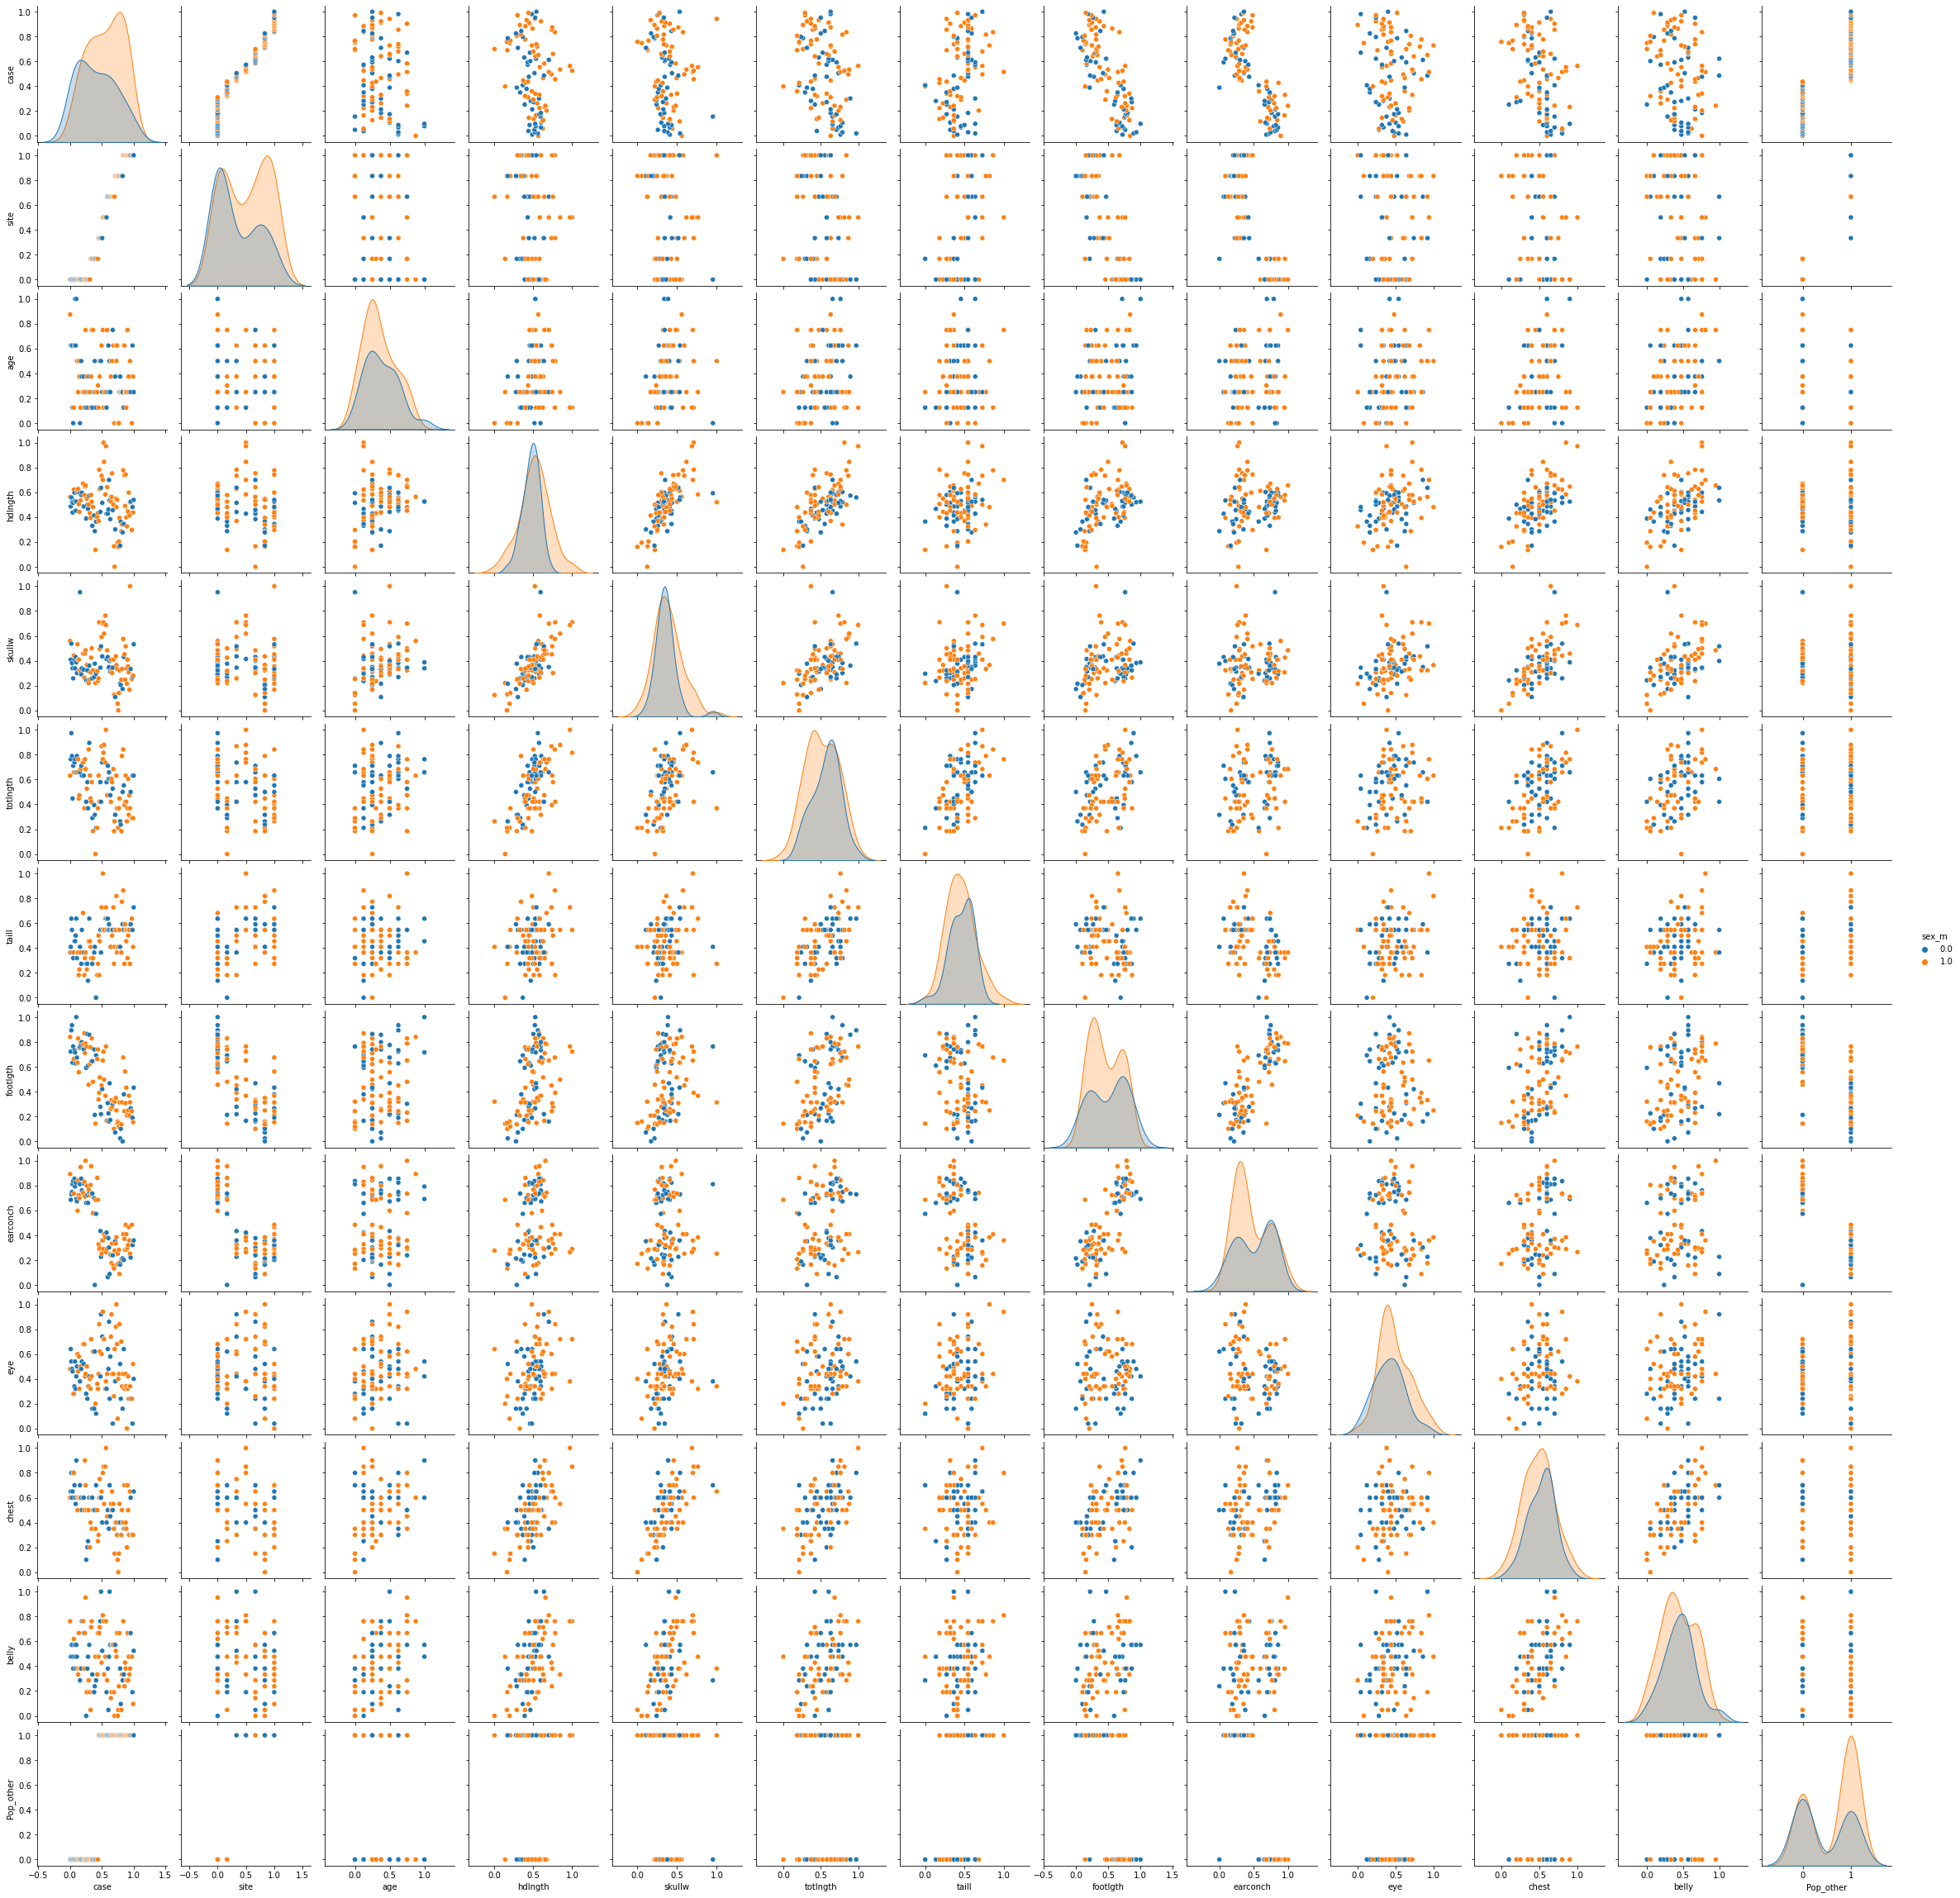

In [378]:
# pairplot
sns.pairplot(ps_d,hue='sex_m')
plt.savefig("possum_pairplot.png",dpi=600)

#### Feature selection

- **hdlngth** - ['skullw', 'totlngth', 'footlgth', 'eye', 'chest', 'belly']
- **age** - ['hdlngth','chest', 'belly']

Note:
- I selected **['hdlngth','skullw','totlngth','footlgth','eye','chest','belly','age']** features to build our model.

## Model Technique selection

### cross_validation

1. **headlength**

In [379]:
ps_f = ps_d[['hdlngth','skullw','totlngth','footlgth','eye','chest','belly']]

In [380]:
ps_dcopy = ps_f.copy()

In [381]:
y_data = ps_dcopy.pop('hdlngth')
x_data = ps_dcopy

In [382]:
from sklearn.model_selection import cross_val_score

In [383]:
def Validation(model,x,y):
    print(str(model) + "cross vlaue scores",cross_val_score(model,x,y))

In [384]:
from sklearn.linear_model import LinearRegression

In [385]:
Validation(LinearRegression(),x_data,y_data)

LinearRegression()cross vlaue scores [-2.05630509  0.61326845  0.55451714  0.51597432  0.17829233]


Note:
- from **cross-validation** I understand that "the feature selection will effects the validation score".
- There is a 46% chance to predict headlength.

2. **age**

In [386]:
ps_a = ps_d[['hdlngth','chest','belly','age']]

In [387]:
ps_dcopy1 = ps_a.copy()

In [388]:
y_d = ps_dcopy1.pop('age')
x_d = ps_dcopy1

In [389]:
Validation(LinearRegression(),x_d,y_d)

LinearRegression()cross vlaue scores [-0.05443891  0.13590129 -0.52352324  0.35279496 -0.13662889]


Note:
- Less chances to predict **age** by using linear regression model. 

3. **finding sex**

In [390]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [391]:
ps_dcopy2 = ps_d[['site', 'hdlngth', 'totlngth', 'eye', 'Pop_other',"sex_m"]]

In [392]:
y_da = ps_dcopy2.pop('sex_m')
x_da = ps_dcopy2

In [393]:
Validation(LogisticRegression(),x_da,y_da)

LogisticRegression()cross vlaue scores [0.4        0.6        0.5        0.6        0.57894737]


In [394]:
Validation(SVC(),x_da,y_da)

SVC()cross vlaue scores [0.4        0.3        0.55       0.6        0.57894737]


In [395]:
Validation(RandomForestClassifier(n_estimators=50),x_da,y_da)

RandomForestClassifier(n_estimators=50)cross vlaue scores [0.4        0.3        0.55       0.4        0.57894737]


**Note:**
- Among 3 classifier models **logstic regression model** has better chance to predict the gender. (50% chance)

## 4. Modeling

##### model selection and building the model

##### 1. Head length

In [396]:
from sklearn.model_selection import train_test_split # data splitting 
np.random.seed(0)
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,train_size=0.75,random_state=100)

In [397]:
print(x_train.head())
print(x_test.head())

      skullw  totlngth  footlgth   eye  chest     belly
36  0.258065  0.289474  0.644970  0.16    0.6  0.333333
6   0.440860  0.657895  0.662722  0.28    0.8  0.619048
3   0.381720  0.789474  0.934911  0.48    0.6  0.571429
46  0.258065  0.631579  0.337278  0.44    0.3  0.476190
12  0.532258  0.657895  0.633136  0.60    0.5  0.380952
      skullw  totlngth  footlgth   eye  chest     belly
34  0.424731  0.421053  0.644970  0.72   0.60  0.714286
33  0.306452  0.447368  0.757396  0.32   0.40  0.047619
90  0.516129  0.631579  0.307692  0.44   0.40  0.380952
30  0.220430  0.842105  0.455621  0.34   0.50  0.285714
66  0.408602  0.421053  0.260355  0.74   0.55  0.142857


In [398]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

Note:
- RFE - the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features.
- variance_inflation_factor used to check the outliers infulence.

In [399]:
lr = LinearRegression()
lr.fit(x_train,y_train)
rfe = RFE(lr,n_features_to_select=4)
rfe = rfe.fit(x_train,y_train)

In [400]:
rfe.ranking_

array([1, 1, 3, 1, 1, 2])

In [401]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('skullw', True, 1),
 ('totlngth', True, 1),
 ('footlgth', False, 3),
 ('eye', True, 1),
 ('chest', True, 1),
 ('belly', False, 2)]

In [402]:
x_train_rfe = x_train[x_train.columns[rfe.support_]]
x_train_rfe.head()

,skullw,totlngth,eye,chest
36,0.258065,0.289474,0.16,0.6
6,0.440860,0.657895,0.28,0.8
3,0.381720,0.789474,0.48,0.6
46,0.258065,0.631579,0.44,0.3
12,0.532258,0.657895,0.60,0.5


## Build Model

In [403]:
def BuildModel(x,y):
    x = sm.add_constant(x)  # adding intercept as 1
    lr = sm.OLS(y,x).fit()  # Ordinary Least Squares(OLS)
    print(lr.summary())
    return x
def checkVIF(x):
    vif = pd.DataFrame()
    vif['features'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['VIF'] = round(vif['VIF'],3)
    vif = vif.sort_values(by = "VIF",ascending = False)
    return vif

In [404]:
x_train_new = BuildModel(x_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                hdlngth   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     34.26
Date:                Mon, 27 Jun 2022   Prob (F-statistic):           9.74e-16
Time:                        11:16:46   Log-Likelihood:                 74.627
No. Observations:                  74   AIC:                            -139.3
Df Residuals:                      69   BIC:                            -127.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0899      0.037      2.414      0.0

**Note:**
- the values less than 5% so no need to drop any feature.

In [405]:
checkVIF(x_train_new)

,features,VIF
0,const,12.290
1,skullw,1.887
4,chest,1.867
2,totlngth,1.428
3,eye,1.131


**Note:**
- outliers are effecting the prediction results because the ouliers are eliminate in **cleaning the data**.

In [406]:
lr.score(x_test,y_test)

0.5392246078185077

**Note:**
- for testing data the accuracy score is around 54% and Adj. R-squared: 0.646 (around 65%).
- 

##### Residual Analysis

In [407]:
lr = sm.OLS(y_train,x_train_new).fit()
y_pred = lr.predict(x_train_new)

<AxesSubplot:ylabel='Density'>

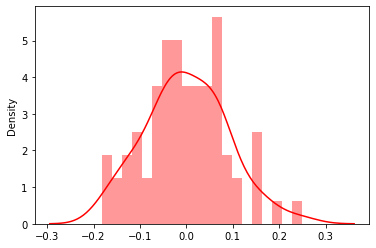

In [408]:
sns.distplot((y_train-y_pred),bins=20,color="Red")

**Note:**
- the residuals distribution like normal distribution. 

## 5. Evaluation

In [409]:
x_train_new = x_train_new.drop(['const'],axis=1)
x_test_new = x_test[x_train_new.columns]

In [410]:
x_test_new = sm.add_constant(x_test_new)

In [411]:
y_tpred = lr.predict(x_test_new)

In [412]:
from sklearn.metrics import r2_score
r2_score(y_test,y_tpred)

0.5078489582429853

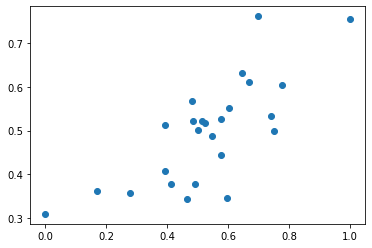

In [413]:
plt.scatter(y_test,y_tpred)

In [414]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                hdlngth   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     34.26
Date:                Mon, 27 Jun 2022   Prob (F-statistic):           9.74e-16
Time:                        11:16:47   Log-Likelihood:                 74.627
No. Observations:                  74   AIC:                            -139.3
Df Residuals:                      69   BIC:                            -127.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0899      0.037      2.414      0.0

##### Note:
- There is a 50% chance to predict the dependent variable **head length** by using independent variables **skull width, total length, eye, chest**.
- As per my understanding we need to improve our model by taking more data (or) try with other regression models.

##### 2. Age

In [415]:
# spliting the data
np.random.seed(0)
x_t,x_te,y_t,y_te = train_test_split(x_d,y_d,train_size=0.75,random_state=100)

In [416]:
lr = LinearRegression()
lr.fit(x_t,y_t)
rfe = RFE(lr,n_features_to_select=3)
rfe = rfe.fit(x_t,y_t)

In [417]:
x_t_rfe = x_t[x_t.columns[rfe.support_]]
x_t_rfe.head()

,hdlngth,chest,belly
36,0.330097,0.6,0.333333
6,0.621359,0.8,0.619048
3,0.519417,0.6,0.571429
46,0.368932,0.3,0.476190
12,0.611650,0.5,0.380952


In [418]:
x_new = BuildModel(x_t_rfe,y_t)

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     5.717
Date:                Mon, 27 Jun 2022   Prob (F-statistic):            0.00147
Time:                        11:16:48   Log-Likelihood:                 5.9963
No. Observations:                  74   AIC:                            -3.993
Df Residuals:                      70   BIC:                             5.224
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0491      0.091      0.538      0.5

**Note:**
- By using the statics summary 'I realized Linear Regression model is not a got model to predict **Age**'.

##### 3. Sex

**Logistic Regression**

In [419]:
x_datrain,x_datest,y_datrain,y_datest = train_test_split(x_da,y_da,test_size=0.25,random_state=30)

In [420]:
lg = LogisticRegression()
lg.fit(x_datrain,y_datrain)
rfe = RFE(lg,n_features_to_select=4)
rfe = rfe.fit(x_datrain,y_datrain)

In [421]:
x_datrain_rfe = x_datrain[x_datrain.columns[rfe.support_]]
x_datrain_rfe.head()

,site,hdlngth,totlngth,eye
90,1.000000,0.742718,0.631579,0.44
81,0.833333,0.169903,0.263158,0.52
25,0.000000,0.655340,0.684211,0.44
51,0.333333,0.733010,0.868421,0.60
95,1.000000,0.597087,0.315789,0.24


In [422]:
def BuildLogModel(x,y):
    x = sm.add_constant(x)
    lg = sm.Logit(y,x).fit()  
    print(lg.summary())
    return x
def checkLogVIF(x):
    vif = pd.DataFrame()
    vif['features'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif['VIF'] = round(vif['VIF'],3)
    vif = vif.sort_values(by = "VIF",ascending = False)
    return vif

In [423]:
x_danew = BuildLogModel(x_datrain_rfe,y_datrain)

Optimization terminated successfully.
         Current function value: 0.566797
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  sex_m   No. Observations:                   74
Model:                          Logit   Df Residuals:                       69
Method:                           MLE   Df Model:                            4
Date:                Mon, 27 Jun 2022   Pseudo R-squ.:                  0.1664
Time:                        11:16:49   Log-Likelihood:                -41.943
converged:                       True   LL-Null:                       -50.316
Covariance Type:            nonrobust   LLR p-value:                  0.002166
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0859      1.094     -0.993      0.321      -3.230       1.058
site           0.2354      0.

In [424]:
checkLogVIF(x_danew)

,features,VIF
0,const,18.095
3,totlngth,1.505
2,hdlngth,1.479
1,site,1.087
4,eye,1.078


In [425]:
x_danew = x_danew.drop(['site'],axis=1)

In [426]:
x_danew = BuildLogModel(x_danew,y_datrain)

Optimization terminated successfully.
         Current function value: 0.567539
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  sex_m   No. Observations:                   74
Model:                          Logit   Df Residuals:                       70
Method:                           MLE   Df Model:                            3
Date:                Mon, 27 Jun 2022   Pseudo R-squ.:                  0.1653
Time:                        11:16:49   Log-Likelihood:                -41.998
converged:                       True   LL-Null:                       -50.316
Covariance Type:            nonrobust   LLR p-value:                 0.0008398
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9465      1.009     -0.938      0.348      -2.924       1.031
hdlngth        5.0647      2.

In [427]:
checkLogVIF(x_danew)

,features,VIF
0,const,15.349
1,hdlngth,1.478
2,totlngth,1.434
3,eye,1.058


In [428]:
lg.score(x_datest,y_datest)

0.64

##### Residual Analysis

In [429]:
lg = sm.Logit(y_datrain,x_danew).fit()
ypredict = lg.predict(x_danew)

Optimization terminated successfully.
         Current function value: 0.567539
         Iterations 6


<AxesSubplot:ylabel='Density'>

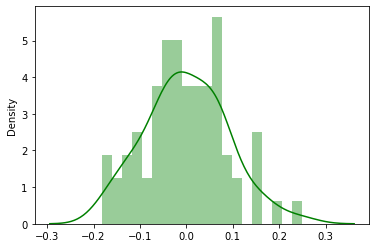

In [430]:
sns.distplot((y_train-y_pred),bins=20,color="Green")

##### Testing the model

In [431]:
x_danew = x_danew.drop(['const'],axis=1)
x_testnew = x_datest[x_danew.columns]

In [432]:
x_testnew = sm.add_constant(x_testnew)

In [433]:
ypr = lg.predict(x_testnew)

In [434]:
# from sklearn.metrics import explained_variance_score
# explained_variance_score(y_datest,ypr)

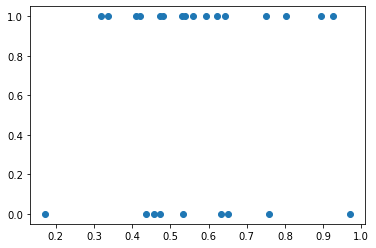

In [435]:
plt.scatter(ypr,y_datest)

**Note:**
- there exist a 56% chance to predict the **age** by using **hdlngth, totlngth, eye** independent variables.

##### Confusion Matrix

In [436]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [437]:
ypr = np.where(ypr > 0.5, 1, 0)

In [438]:
ypr

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0])

In [439]:
cm = confusion_matrix(y_datest,ypr)
print(cm)

[[ 4  5]
 [ 6 10]]


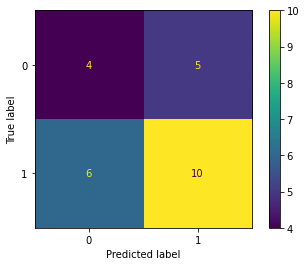

In [440]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

- type I error is 5 (false positive)
- type II error is 6 (false negative)

In [441]:
from sklearn.metrics import classification_report

In [442]:
classification_report(y_datest,ypr)

'              precision    recall  f1-score   support\n\n         0.0       0.40      0.44      0.42         9\n         1.0       0.67      0.62      0.65        16\n\n    accuracy                           0.56        25\n   macro avg       0.53      0.53      0.53        25\nweighted avg       0.57      0.56      0.56        25\n'

**Note:**
Accuracy is 56%